In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
df = pd.read_csv('/content/sample_data/D3.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


100

In [47]:
X1 = df.values[:, 0]  # get input values from X1 column
y = df.values[:, 3]  # get output values from Y column
m = len(y) # Number of training examples 
print('X1 = ', X1[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 


X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


Text(0.5, 1.0, 'Scatter plot of training data for X1')

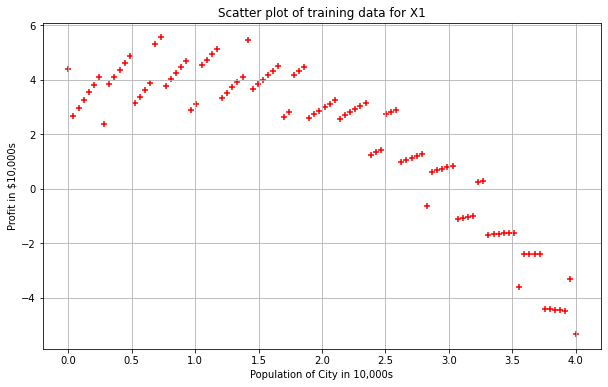

In [48]:
plt.scatter(X1,y, color='red',marker= '+') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Scatter plot of training data for X1') 

In [49]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((m, 1)) 
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [50]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_1 = X1.reshape(m, 1) 
X_1[:10] 
print('X_1:', X_1)


X_1: [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]
 [0.2020202 ]
 [0.24242424]
 [0.28282828]
 [0.32323232]
 [0.36363636]
 [0.4040404 ]
 [0.44444444]
 [0.48484848]
 [0.52525252]
 [0.56565657]
 [0.60606061]
 [0.64646465]
 [0.68686869]
 [0.72727273]
 [0.76767677]
 [0.80808081]
 [0.84848485]
 [0.88888889]
 [0.92929293]
 [0.96969697]
 [1.01010101]
 [1.05050505]
 [1.09090909]
 [1.13131313]
 [1.17171717]
 [1.21212121]
 [1.25252525]
 [1.29292929]
 [1.33333333]
 [1.37373737]
 [1.41414141]
 [1.45454546]
 [1.49494949]
 [1.53535354]
 [1.57575758]
 [1.61616162]
 [1.65656566]
 [1.6969697 ]
 [1.73737374]
 [1.77777778]
 [1.81818182]
 [1.85858586]
 [1.8989899 ]
 [1.93939394]
 [1.97979798]
 [2.02020202]
 [2.06060606]
 [2.1010101 ]
 [2.14141414]
 [2.18181818]
 [2.22222222]
 [2.26262626]
 [2.3030303 ]
 [2.34343434]
 [2.38383838]
 [2.42424242]
 [2.46464646]
 [2.5050505 ]
 [2.54545455]
 [2.58585859]
 [2.62626263]
 [2.66666667]
 [2.70707071]
 [2.74747475]
 [2.78787879]
 [2.82828283]
 

In [51]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X01 = np.hstack((X_0, X_1)) 
X01[:5] 


array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [52]:
theta = np.zeros(2) 
theta 

array([0., 0.])

In [53]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [54]:
# Lets compute the cost for theta values 
cost01 = compute_cost(X01, y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost01) 


The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [55]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
   """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [56]:
theta = [0., 0.] 
iterations = 1500; 
alpha = 0.01; 
theta, cost_history01 = gradient_descent(X01, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history01)

Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


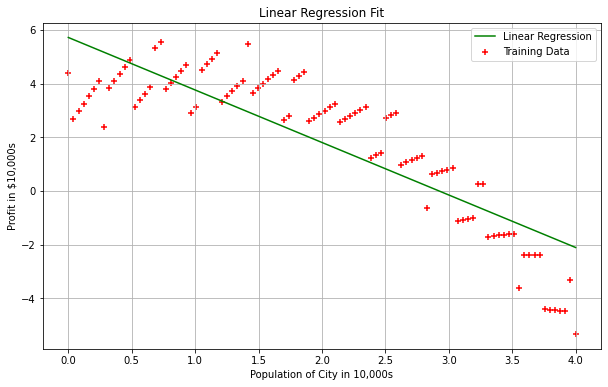

In [57]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X01[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X01[:,1],X01.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

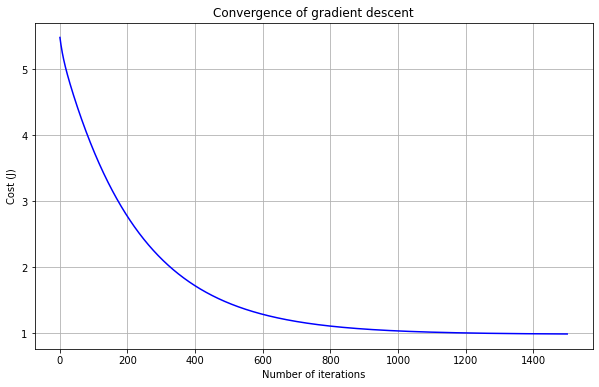

In [58]:
plt.plot(range(1, iterations + 1),cost_history01, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 